# Proyecto Final de Maestría - Mixto v2
## Imputación de Datos mediante Métodos Estadísticos, Aprendizaje Automático y Aprendizaje Profundo

## Preprocesamiento de Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.datasets import fetch_openml
data = fetch_openml("titanic", version=1,as_frame=True, target_column=None).data

In [ ]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
data = data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'survived']]

In [ ]:
data.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.837836,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
data.dtypes

pclass       float64
sex         category
age          float64
sibsp        float64
parch        float64
fare         float64
survived    category
dtype: object

In [ ]:
data.isnull().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
survived      0
dtype: int64

In [ ]:
for column in data:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mean(), inplace=True)

In [ ]:
for column in data:
    if data[column].dtype == 'category':
        print(f"{column} : {data[column].value_counts()}")
        print('-'*40)

sex : male      843
female    466
Name: sex, dtype: int64
----------------------------------------
survived : 0    809
1    500
Name: survived, dtype: int64
----------------------------------------


In [ ]:
from sklearn.preprocessing import OneHotEncoder

oe = OneHotEncoder()
data = data.join(pd.DataFrame(columns= ['female', 'male'], data=oe.fit_transform(data[['sex']]).toarray()))
data.drop(columns='sex', inplace=True)
data.head()

,pclass,age,sibsp,parch,fare,survived,female,male
0,1.0,29.0000,0.0,0.0,211.3375,1,1.0,0.0
1,1.0,0.9167,1.0,2.0,151.5500,1,0.0,1.0
2,1.0,2.0000,1.0,2.0,151.5500,0,1.0,0.0
3,1.0,30.0000,1.0,2.0,151.5500,0,0.0,1.0
4,1.0,25.0000,1.0,2.0,151.5500,0,1.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['survived'] = le.fit_transform(data['survived'])

## Regresión

In [ ]:
X = data[['pclass', 'fare', 'sibsp', 'parch', 'female', 'male', 'survived']]
X.head()

,pclass,fare,sibsp,parch,female,male,survived
0,1.0,211.3375,0.0,0.0,1.0,0.0,1
1,1.0,151.5500,1.0,2.0,0.0,1.0,1
2,1.0,151.5500,1.0,2.0,1.0,0.0,0
3,1.0,151.5500,1.0,2.0,0.0,1.0,0
4,1.0,151.5500,1.0,2.0,1.0,0.0,0


In [ ]:
y = data['age']
y.head()

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from time import time
import missingno as msno
import matplotlib.pyplot as plt

per_null_values = map(lambda x: x/100, range(5, 50, 5))
var_name = 'age'
random_seed = 1
results = []
df_null = pd.DataFrame()

for per_null in per_null_values:
    times = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=per_null, random_state=random_seed)
    #recopilacion de columnas con valores nulos
    missing_data = data.copy()
    missing_data.loc[y_test.index, var_name] = np.nan
    df_null[f'{str(per_null)}'] = missing_data[var_name]

    #imputacion mediante metodos estadisticos
    mean = y_train.mean()
    start_time = time()
    y_pred_mean = pd.Series(data=mean, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    median = y_train.median()
    start_time = time()
    y_pred_median = pd.Series(data=median, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    max_freq = y_train.value_counts().idxmax()
    start_time = time()
    y_pred_max_freq = pd.Series(data=max_freq, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    #imputacion mediante metodos de aprendizaje automatico
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    start_time = time()
    y_pred_linreg = lm.predict(X_test)
    y_pred_linreg = pd.Series(data=y_pred_linreg, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    svr = SVR()
    svr.fit(X_train, y_train)
    start_time = time()
    y_pred_supvec = svr.predict(X_test)
    y_pred_supvec = pd.Series(data=y_pred_supvec, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    dtr = tree.DecisionTreeRegressor(random_state=random_seed)
    dtr.fit(X_train, y_train)
    start_time = time()
    y_pred_dectre = dtr.predict(X_test)
    y_pred_dectre = pd.Series(data=y_pred_dectre, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    rfr = RandomForestRegressor(random_state=random_seed)
    rfr.fit(X_train, y_train)
    start_time = time()
    y_pred_ranfor = rfr.predict(X_test)
    y_pred_ranfor = pd.Series(data=y_pred_ranfor, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    #imputacion mediante metodos de aprendizaje profundo
    ann = MLPRegressor(random_state=random_seed)
    ann.fit(X_train, y_train)
    start_time = time()
    y_pred_artneu = ann.predict(X_test)
    y_pred_artneu = pd.Series(data=y_pred_artneu, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    methods = ['Media', 'Mediana', 'Maxima Frecuencia',
              'Regresion lineal multiple', 'Maquina de Vector de Soporte', 'Arbol de Decision',
              'Bosque Aleatorio', 'Red Neuronal Artificial']
    y_pred = [y_pred_mean, y_pred_median, y_pred_max_freq,
              y_pred_linreg, y_pred_supvec, y_pred_dectre,
              y_pred_ranfor, y_pred_artneu]

    for index, method in enumerate(methods):
        results.append({
            'Porcentaje de Nulos' : per_null,
            'Metodo': method,
            'RMSE': round(mean_squared_error(y_test, y_pred[index]), 2),
            'Duracion' : times[index]})

results = pd.DataFrame(results)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

In [ ]:
results

,Porcentaje de Nulos,Metodo,RMSE,Duracion
0,0.05,Media,175.07,0.001599
1,0.05,Mediana,174.90,0.000195
2,0.05,Maxima Frecuencia,174.90,0.000168
3,0.05,Regresion lineal multiple,139.10,0.007667
4,0.05,Maquina de Vector de Soporte,170.88,0.030640
...,...,...,...,...
67,0.45,Regresion lineal multiple,132.82,0.002689
68,0.45,Maquina de Vector de Soporte,160.97,0.040319
69,0.45,Arbol de Decision,190.68,0.002684
70,0.45,Bosque Aleatorio,139.92,0.022633


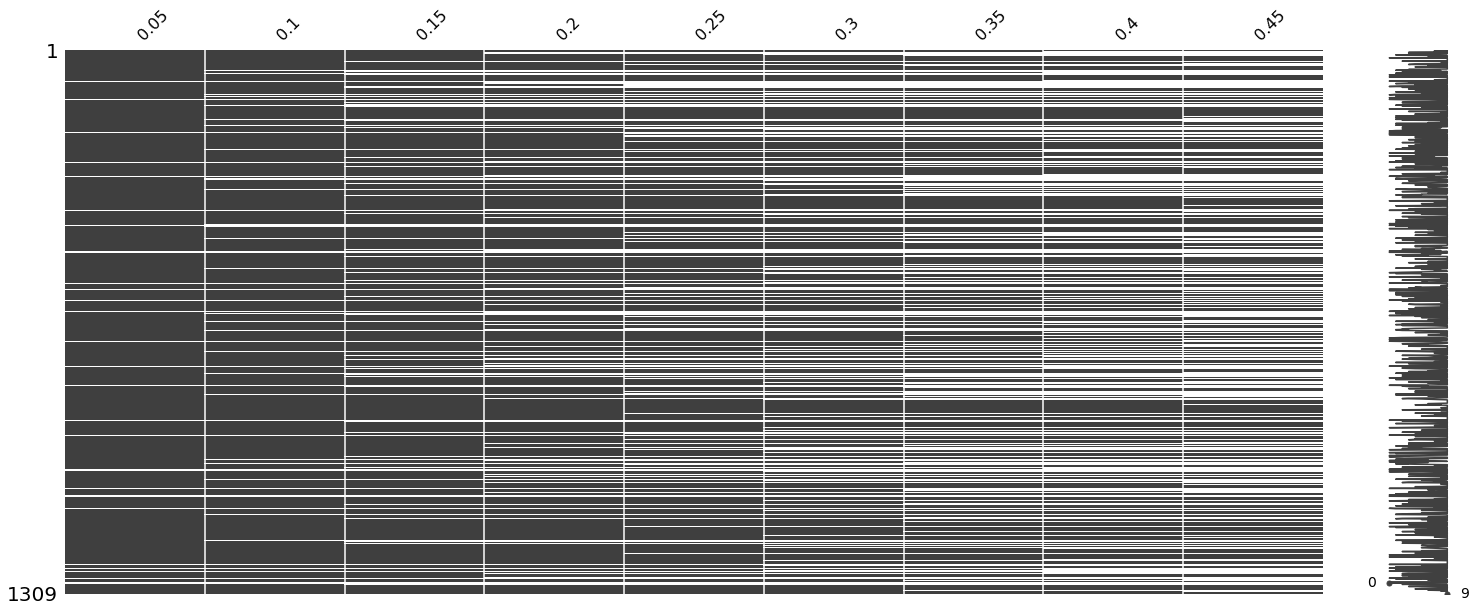

In [ ]:
msno.matrix(df_null)
plt.savefig('mix_regression_missing.eps')
plt.show()

In [ ]:
regression_results = results.pivot(index='Porcentaje de Nulos', columns='Metodo', values='RMSE')
regression_results

Metodo,Arbol de Decision,Bosque Aleatorio,Maquina de Vector de Soporte,Maxima Frecuencia,Media,Mediana,Red Neuronal Artificial,Regresion lineal multiple
Porcentaje de Nulos,,,,,,,,
0.05,130.45,121.39,170.88,174.90,175.07,174.90,150.52,139.10
0.10,141.54,112.97,154.67,159.52,159.60,159.52,143.63,125.79
0.15,183.27,131.64,171.24,175.48,175.48,175.48,163.56,129.53
0.20,177.33,133.80,168.15,172.81,172.82,172.81,146.09,129.51
0.25,194.60,131.42,169.40,172.75,172.86,172.75,166.09,129.28
0.30,180.73,121.11,163.97,166.17,166.20,166.17,152.66,125.22
0.35,180.58,123.39,158.55,160.20,160.27,160.20,159.36,124.35
0.40,182.14,137.04,163.49,165.29,165.30,165.29,170.29,131.61
0.45,190.68,139.92,160.97,162.86,162.90,162.86,166.69,132.82


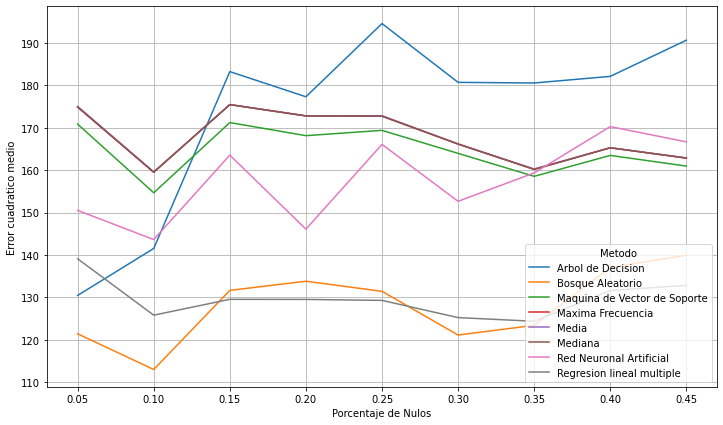

In [ ]:
regression_results.plot(grid=True, legend=True, figsize=(12,7))
plt.ylabel('Error cuadratico medio')
plt.savefig('mix_regression_results.eps')

In [ ]:
regression_times = results.pivot(index='Porcentaje de Nulos', columns='Metodo', values='Duracion')
regression_times

Metodo,Arbol de Decision,Bosque Aleatorio,Maquina de Vector de Soporte,Maxima Frecuencia,Media,Mediana,Red Neuronal Artificial,Regresion lineal multiple
Porcentaje de Nulos,,,,,,,,
0.05,0.003795,0.040401,0.030640,0.000168,0.001599,0.000195,0.010923,0.007667
0.10,0.003253,0.029581,0.022722,0.000143,0.000206,0.000148,0.009695,0.003158
0.15,0.002997,0.028167,0.023814,0.000127,0.000184,0.000145,0.028678,0.006827
0.20,0.002902,0.018793,0.027907,0.000143,0.000258,0.000162,0.003199,0.002966
0.25,0.001871,0.019808,0.022938,0.000126,0.000185,0.000144,0.003914,0.002665
0.30,0.001810,0.020226,0.033175,0.000132,0.000154,0.000149,0.004217,0.002564
0.35,0.002166,0.023834,0.038489,0.000127,0.000156,0.000143,0.003896,0.002674
0.40,0.001959,0.022438,0.040262,0.000129,0.000174,0.000145,0.004309,0.002941
0.45,0.002684,0.022633,0.040319,0.000129,0.000165,0.000147,0.004173,0.002689


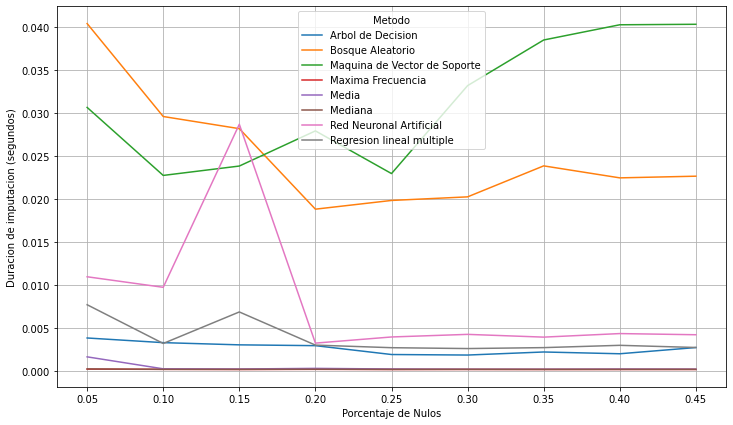

In [ ]:
regression_times.plot(grid=True, legend=True, figsize=(12,7))
plt.ylabel('Duracion de imputacion (segundos)')
plt.savefig('mix_regression_times.eps')

In [ ]:
results.groupby(by='Metodo').mean().sort_values(by='RMSE', ascending=True)[['RMSE', 'Duracion']]

,RMSE,Duracion
Metodo,,
Bosque Aleatorio,128.075556,0.025098
Regresion lineal multiple,129.690000,0.003795
Red Neuronal Artificial,157.654444,0.008112
Maquina de Vector de Soporte,164.591111,0.031141
Maxima Frecuencia,167.775556,0.000136
Mediana,167.775556,0.000153
Media,167.833333,0.000342
Arbol de Decision,173.480000,0.002604


## Clasificación

In [ ]:
X = data[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'fare']]
X.head()

,pclass,age,sibsp,parch,female,male,fare
0,1.0,29.0000,0.0,0.0,1.0,0.0,211.3375
1,1.0,0.9167,1.0,2.0,0.0,1.0,151.5500
2,1.0,2.0000,1.0,2.0,1.0,0.0,151.5500
3,1.0,30.0000,1.0,2.0,0.0,1.0,151.5500
4,1.0,25.0000,1.0,2.0,1.0,0.0,151.5500


In [ ]:
y = data['survived']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from time import time
import missingno as msno
import matplotlib.pyplot as plt

per_null_values = map(lambda x: x/100, range(5, 50, 5))
var_name = 'survived'
random_seed = 1
results = []
df_null = pd.DataFrame()

for per_null in per_null_values:
    times = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=per_null, random_state=random_seed)
    #recopilacion de columnas con valores nulos
    missing_data = data.copy()
    missing_data.loc[y_test.index, var_name] = np.nan
    df_null[f'{str(per_null)}'] = missing_data[var_name]

    #imputacion mediante metodos estadisticos
    mean = y_train.mean()
    start_time = time()
    y_pred_mean = pd.Series(data=mean, index=y_test.index, name=var_name, dtype=int)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    median = y_train.median()
    start_time = time()
    y_pred_median = pd.Series(data=median, index=y_test.index, name=var_name, dtype=int)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    max_freq = y_train.value_counts().idxmax()
    start_time = time()
    y_pred_max_freq = pd.Series(data=max_freq, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    #imputacion mediante metodos de aprendizaje automatico
    lm = LogisticRegression()
    lm.fit(X_train, y_train)
    start_time = time()
    y_pred_logreg = lm.predict(X_test)
    y_pred_logreg = pd.Series(data=y_pred_logreg, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    svc = SVC()
    svc.fit(X_train, y_train)
    start_time = time()
    y_pred_supvec = svc.predict(X_test)
    y_pred_supvec = pd.Series(data=y_pred_supvec, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    dtc = tree.DecisionTreeClassifier(random_state=random_seed)
    dtc.fit(X_train, y_train)
    start_time = time()
    y_pred_dectre = dtc.predict(X_test)
    y_pred_dectre = pd.Series(data=y_pred_dectre, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)


    rfc = RandomForestClassifier(random_state=random_seed)
    rfc.fit(X_train, y_train)
    start_time = time()
    y_pred_ranfor = rfc.predict(X_test)
    y_pred_ranfor = pd.Series(data=y_pred_ranfor, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    #imputacion mediante metodos de aprendizaje profundo
    ann = MLPClassifier(random_state=random_seed)
    ann.fit(X_train, y_train)
    start_time = time()
    y_pred_artneu = ann.predict(X_test)
    y_pred_artneu = pd.Series(data=y_pred_artneu, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    methods = ['Media', 'Mediana', 'Maxima Frecuencia',
               'Regresion logistica', 'Maquina de Vector de Soporte', 'Arbol de Decision',
               'Bosque Aleatorio', 'Red Neuronal Artificial']
    y_pred = [y_pred_mean, y_pred_median, y_pred_max_freq,
              y_pred_logreg, y_pred_supvec, y_pred_dectre,
              y_pred_ranfor, y_pred_artneu]

    for index, method in enumerate(methods):
        results.append({
            'Porcentaje de Nulos' : per_null,
            'Metodo': method,
            'Precision': round(accuracy_score(y_test, y_pred[index])*100, 2),
            'Duracion' : times[index]})

results = pd.DataFrame(results)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

In [ ]:
results

,Porcentaje de Nulos,Metodo,Precision,Duracion
0,0.05,Media,66.67,0.000708
1,0.05,Mediana,66.67,0.000168
2,0.05,Maxima Frecuencia,66.67,0.000542
3,0.05,Regresion logistica,83.33,0.003949
4,0.05,Maquina de Vector de Soporte,74.24,0.009087
...,...,...,...,...
67,0.45,Regresion logistica,80.17,0.003131
68,0.45,Maquina de Vector de Soporte,66.10,0.032237
69,0.45,Arbol de Decision,75.08,0.001788
70,0.45,Bosque Aleatorio,77.97,0.026624


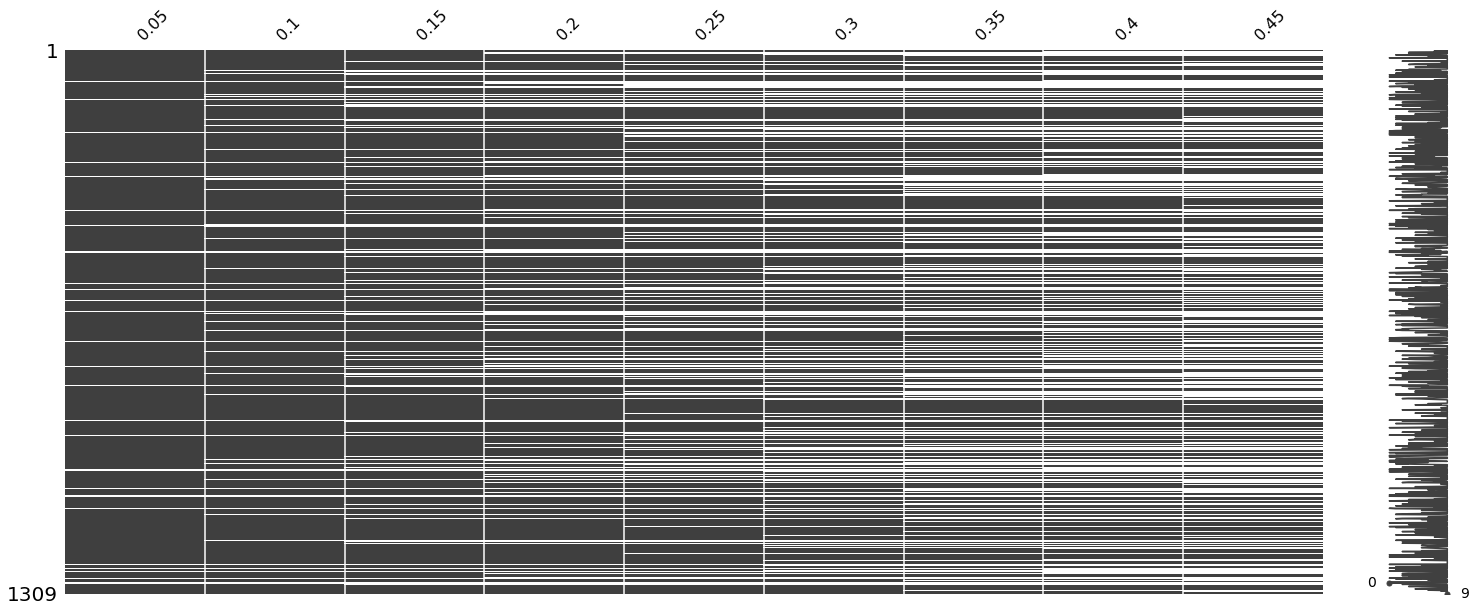

In [ ]:
msno.matrix(df_null)
plt.savefig('mix_classification_missing.eps')
plt.show()

In [ ]:
classification_results = results.pivot(index='Porcentaje de Nulos', columns='Metodo', values='Precision')
classification_results

Metodo,Arbol de Decision,Bosque Aleatorio,Maquina de Vector de Soporte,Maxima Frecuencia,Media,Mediana,Red Neuronal Artificial,Regresion logistica
Porcentaje de Nulos,,,,,,,,
0.05,81.82,84.85,74.24,66.67,66.67,66.67,80.30,83.33
0.10,80.15,83.21,69.47,61.07,61.07,61.07,80.92,83.21
0.15,77.16,79.19,65.99,59.90,59.90,59.90,83.25,83.25
0.20,77.10,78.24,64.12,59.54,59.54,59.54,80.53,82.44
0.25,76.52,77.13,63.11,59.45,59.45,59.45,79.27,81.10
0.30,76.84,78.88,64.38,60.05,60.05,60.05,79.64,80.15
0.35,76.03,78.00,64.92,60.35,60.35,60.35,79.30,80.17
0.40,74.24,77.86,64.50,60.50,60.50,60.50,78.24,79.39
0.45,75.08,77.97,66.10,60.34,60.34,60.34,78.98,80.17


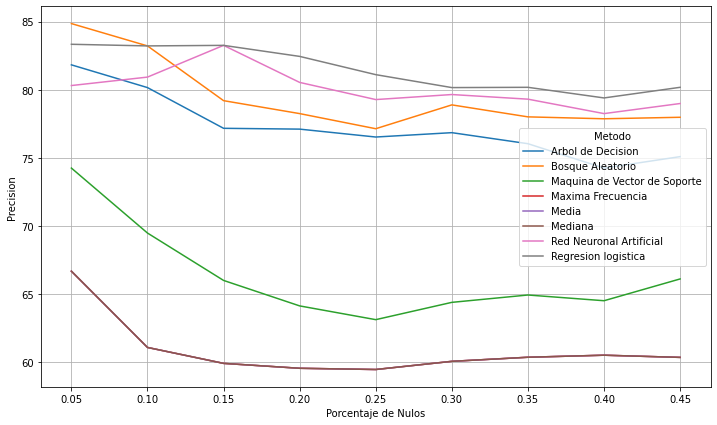

In [ ]:
classification_results.plot(grid=True, legend=True, figsize=(12,7))
plt.ylabel('Precision')
plt.savefig('mix_classification_results.eps')

In [ ]:
classification_times = results.pivot(index='Porcentaje de Nulos', columns='Metodo', values='Duracion')
classification_times

Metodo,Arbol de Decision,Bosque Aleatorio,Maquina de Vector de Soporte,Maxima Frecuencia,Media,Mediana,Red Neuronal Artificial,Regresion logistica
Porcentaje de Nulos,,,,,,,,
0.05,0.001528,0.013255,0.004560,0.000351,0.000427,0.000096,0.002418,0.001564
0.10,0.001817,0.022794,0.007607,0.000183,0.000146,0.000159,0.003203,0.002808
0.15,0.001366,0.016757,0.008991,0.000111,0.000144,0.000123,0.002551,0.002093
0.20,0.001557,0.017911,0.011388,0.000122,0.000170,0.000135,0.002615,0.002141
0.25,0.001669,0.020736,0.013835,0.000110,0.000190,0.000134,0.004188,0.002993
0.30,0.001351,0.020363,0.019758,0.000104,0.000196,0.000137,0.003131,0.002110
0.35,0.001431,0.021024,0.026620,0.000099,0.000150,0.000136,0.002703,0.002092
0.40,0.001516,0.024595,0.031796,0.000111,0.000145,0.000126,0.003663,0.003513
0.45,0.001960,0.046310,0.032901,0.000123,0.000182,0.000118,0.008800,0.002717


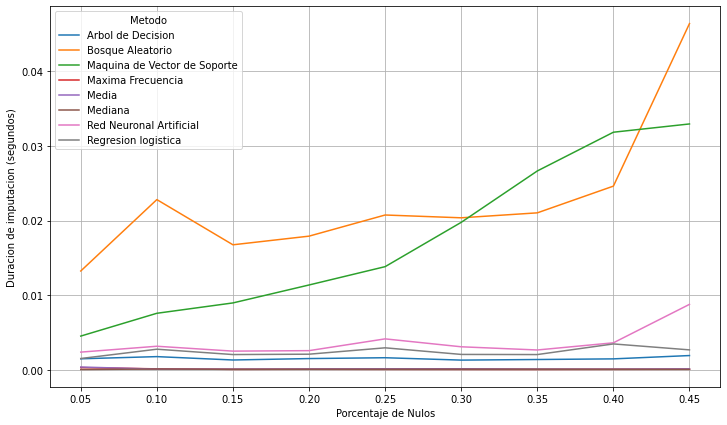

In [ ]:
classification_times.plot(grid=True, legend=True, figsize=(12,7))
plt.ylabel('Duracion de imputacion (segundos)')
plt.savefig('mix_classification_times.eps')

In [ ]:
results.groupby(by='Metodo').mean().sort_values(by='Precision', ascending=False)[['Precision', 'Duracion']]

,Precision,Duracion
Metodo,,
Regresion logistica,81.467778,0.002448
Red Neuronal Artificial,80.047778,0.003697
Bosque Aleatorio,79.481111,0.022638
Arbol de Decision,77.215556,0.001577
Maquina de Vector de Soporte,66.314444,0.017495
Maxima Frecuencia,60.874444,0.000146
Media,60.874444,0.000194
Mediana,60.874444,0.000129
